In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import json
import cv2
from tqdm import tqdm
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle

# Load the postprocess_redgreen_human_data.py file
from postprocess_redgreen_human_data import *

##############################################################
# DEAR EXPERIMENTER, DEFINE ALL VARIABLES BELOW IN THIS CELL #
##############################################################

###################################################################################
expected_num_participants = 20 # expected number of participants
participant_FPS = 30 # frames per second given to participants

# NOTE: this is the db file name - try root instance/ first, then backend/instance/
db_path = "/Users/arijitdasgupta/Desktop/projects/red_green_projects/red_green_experimental_site/backend/instance/ecog_stimuli_v6_pilot_dec15_2025_redgreen.db"


# db_path = os.path.join(os.getcwd(), "cogsci_2025_human_raw_database.db")
# NOTE: this is the path to the trial data
path_to_data = "/Users/arijitdasgupta/Desktop/projects/red_green_projects/red_green_experimental_site/backend/trial_data/ecog_stimuli_v6"
print(f"Using database: {db_path}")
print(f"Using trial data path: {path_to_data}")
#################################################################################

Using database: /Users/arijitdasgupta/Desktop/projects/red_green_projects/red_green_experimental_site/backend/instance/ecog_stimuli_v6_pilot_dec15_2025_redgreen.db
Using trial data path: /Users/arijitdasgupta/Desktop/projects/red_green_projects/red_green_experimental_site/backend/trial_data/ecog_stimuli_v6


## Extract, preprocess and save data into pkl file

In [ ]:
session_df, trial_df, keystate_df, rgplot_df, valid_trial_ids, global_trial_names = extract_human_data(db_path, path_to_data, exp_trial_prefixes=['CC_control', 'CC_surprise', 'UC_positive', 'UC_negative'], fam_trial_prefixes=['F'], 
                       allow_incomplete_sessions=False, session_ids=None)
keystate_by_trial = save_human_data_by_trial(trial_df, keystate_df, path_to_data)

Found 20 sessions (allow_incomplete=False, session_ids=None)
Found 1200 completed experimental trials from selected sessions
Sample trial names from database: ['UC_positive_nosurprise_15', 'CC_surprise_12', 'UC_positive_nosurprise_15', 'UC_negative_nosurprise_9', 'CC_surprise_12']
Found 60 trial folders matching prefixes ['CC_control', 'CC_surprise', 'UC_positive', 'UC_negative']
Sample folder names: ['CC_control_1', 'CC_control_10', 'CC_control_11', 'CC_control_12', 'CC_control_13']
Created rg_outcome_df with 60 rows
After merging trial_df with rg_outcome_df: 1198 rows (was 1198)
After merging keystate_df: 577018 rows
After merging rgplot_df: 28899 rows
Final result: 20 sessions, 1198 trials, 577018 keystates, 28899 rgplot rows
Saved human data as CSV files in /Users/arijitdasgupta/Desktop/projects/red_green_projects/red_green_experimental_site/backend/trial_data/ecog_stimuli_v6


## Check duplicates, print demographic info and see score distribution per participant

In [3]:
###########################################################################################
# Unit test to ensure no duplicated trials and all trials have the appropriate data count #
##########################################################################################
duplicates = find_duplicate_completed_trials(trial_df)
if not duplicates.empty:
    print("Duplicate completed trials found:")
    print(duplicates)
else:
    print("No duplicate completed trials found.")
trial_counts = count_completed_trials_by_global_name(trial_df)
trial_counts[trial_counts['count'] != expected_num_participants//2]

No duplicate completed trials found.


,global_trial_name,count
0,CC_control_1,20
1,CC_control_10,20
2,CC_control_11,20
3,CC_control_12,20
4,CC_control_13,20
5,CC_control_14,20
6,CC_control_15,20
7,CC_control_2,20
8,CC_control_3,20
9,CC_control_4,20


In [ ]:
####################
# Demographic Data #
####################
# NOTE: REWRITE THE PATH TO THE DEMOGRAPHIC DATA TO FIT YOUR DATA
demographic_path = os.path.join(os.getcwd(), "cogsci_2025_human_demographics.csv")
print_demo_data(session_df, demographic_path)

20


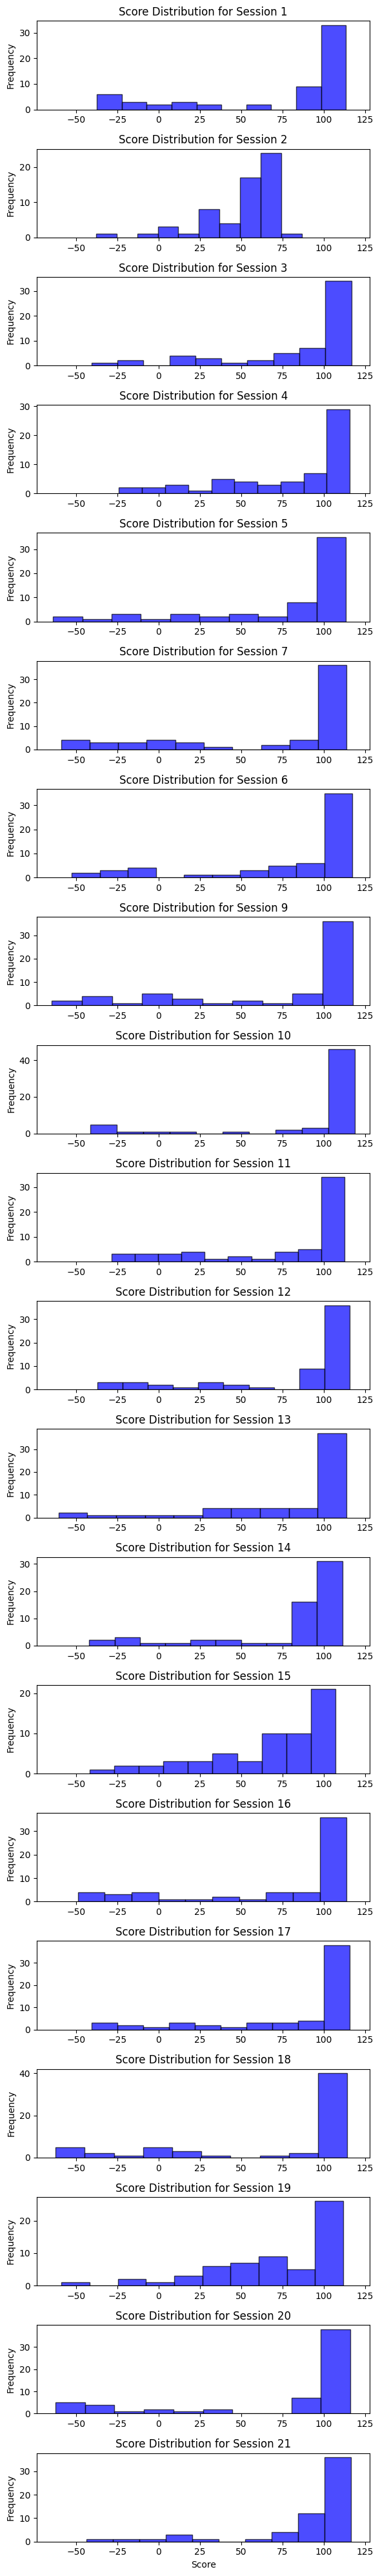

In [4]:
#######################################################################
# Distribution of scores identified in CURRENT valid participant data #
#######################################################################
plot_scores_distribution(trial_df)

In [ ]:
keystate_df